<a href="https://colab.research.google.com/github/Maiiiyasser/Melanoma-Diagnosis-Using-Lesion-Segmentation/blob/main/Unet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Conv1D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from keras.models import Model
from keras.layers import merge, Flatten, Dense, Input, Dropout, Activation, Reshape
from keras.layers import Convolution1D, Convolution2D, MaxPooling2D, ZeroPadding2D, UpSampling2D, GlobalMaxPooling2D, MaxPooling3D
from keras.layers import BatchNormalization,SpatialDropout2D, concatenate
from keras.layers.noise import GaussianNoise
import h5py
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# importing packages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import datetime
import itertools 
import warnings
warnings.simplefilter("ignore")

import tensorflow as tf
from tensorflow.keras import models, layers, regularizers, optimizers, applications
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import MaxPool2D, Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, UpSampling2D, Input, Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import VGG19, MobileNetV2
from tensorflow.keras.metrics import AUC, Precision, Recall
from sklearn.metrics import confusion_matrix, classification_report


from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve, precision_recall_curve
from keras import backend as K
from skimage.io import imread, imshow
import cv2
%reload_ext autoreload
%autoreload 2

In [ ]:
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 1.2 MB/s 


In [ ]:
!wget -P --show-progress $'https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Data.zip' -P $'destination_folder'
!wget -P --show-progress $'https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Part1_GroundTruth.zip' -P $'destination_folder'
!wget -P --show-progress $'https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Data.zip' -P $'destination_folder'
!wget -P --show-progress $'https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Part1_GroundTruth.zip' -P $'destination_folder'
!wget -P --show-progress $'https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Data.zip' -P $'destination_folder'
!wget -P --show-progress $'https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Part1_GroundTruth.zip' -P $'destination_folder'

--2022-01-31 10:52:06--  https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Data.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.101.236
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.101.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6229496702 (5.8G) [application/zip]
Saving to: ‘destination_folder/ISIC-2017_Training_Data.zip’

ISIC-2017_Training_ 100%[===================>]   5.80G  45.4MB/s    in 1m 51s  

2022-01-31 10:53:57 (53.3 MB/s) - ‘destination_folder/ISIC-2017_Training_Data.zip’ saved [6229496702/6229496702]

--2022-01-31 10:53:59--  https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Part1_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.108.52
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.108.52

In [ ]:
!unzip destination_folder/ISIC-2017_Training_Data.zip
!unzip destination_folder/ISIC-2017_Training_Part1_GroundTruth.zip
!unzip destination_folder/ISIC-2017_Validation_Data.zip -d "/content/ISIC-2017_Validation_Data/"
!unzip destination_folder/ISIC-2017_Validation_Part1_GroundTruth.zip -d "/content/ISIC-2017_Validation_Data/"
!unzip destination_folder/ISIC-2017_Test_v2_Data.zip -d "/content/ISIC-2017_Test_v2_Data/"
!unzip destination_folder/ISIC-2017_Test_v2_Part1_GroundTruth.zip -d "/content/ISIC-2017_Test_v2_Data/"

Streaming output truncated to the last 5000 lines.
  inflating: ISIC-2017_Training_Data/ISIC_0013862.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013862_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013864.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013864_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013865.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013865_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013874.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013874_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013876.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013876_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013879.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013879_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013886.jpg  
  inflating: ISIC-2017_Training_Data/ISIC_0013886_superpixels.png  
  inflating: ISIC-2017_Training_Data/ISIC_0013888.jpg  
  inflating: ISIC-2017_Tr

In [ ]:
train_dataset_path = "/content/ISIC-2017_Training_Data"
train_gt_dataset_path = "/content/ISIC-2017_Training_Part1_GroundTruth"

test_dataset_path = "/content/ISIC-2017_Test_v2_Data/ISIC-2017_Test_v2_Data"
test_gt_dataset_path = "/content/ISIC-2017_Test_v2_Data/ISIC-2017_Test_v2_Part1_GroundTruth"

validation_dataset_path = "/content/ISIC-2017_Validation_Data/ISIC-2017_Validation_Data"
validation_gt_dataset_path = "/content/ISIC-2017_Validation_Data/ISIC-2017_Validation_Part1_GroundTruth"

# **Dataset breakdown**

In [ ]:
path_train = "/content/ISIC-2017_Training_Data/"
path_train_gt = "/content/ISIC-2017_Training_Part1_GroundTruth/"

path_valid = "/content/ISIC-2017_Validation_Data/ISIC-2017_Validation_Data/"
path_valid_gt = "/content/ISIC-2017_Validation_Data/ISIC-2017_Validation_Part1_GroundTruth/"


train_dataset_path = os.listdir("/content/ISIC-2017_Training_Data/")
train_gt_dataset_path = os.listdir("/content/ISIC-2017_Training_Part1_GroundTruth/")

validation_dataset_path = os.listdir("/content/ISIC-2017_Validation_Data/ISIC-2017_Validation_Data/")
validation_gt_dataset_path = os.listdir("/content/ISIC-2017_Validation_Data/ISIC-2017_Validation_Part1_GroundTruth/")


train_data =  sorted(train_dataset_path)
train_data = train_data[1:]
train_gt_data =  sorted(train_gt_dataset_path)

valid_data =  sorted(validation_dataset_path)
valid_data = valid_data[1:]
valid_gt_data =  sorted(validation_gt_dataset_path)


training_images = []
training_gt_images = []
valid_images = []
valid_gt_images = []
count = 0

for file in train_dataset_path:
  if (count > 2000):
    break
  else:
    if file.endswith('.jpg'):
      image = imread(path_train + train_data[count])
      training_images.append(cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA))
      count += 1

count = 0
for file in train_gt_dataset_path:
  if (count > 2000):
    break
  else:
    image = imread(path_train_gt+train_gt_data[count])
    #image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    image = image / 255
    training_gt_images.append(cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA))
    count += 1



# Validation

count = 0
for file in validation_dataset_path:
  if (count > 150):
    break
  else:
    if file.endswith('.jpg'):
      image = imread(path_valid+valid_data[count])
      valid_images.append(cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA))
      count += 1


count = 0
for file in validation_gt_dataset_path:
  if (count > 150):
    break
  else:
    image = imread(path_valid_gt+valid_gt_data[count])
    #image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    image = image / 255
    valid_gt_images.append(cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA))
    count += 1
        

In [ ]:
training_images = np.array(training_images)
training_gt_images = np.array(training_gt_images)
valid_images = np.array(valid_images)
valid_gt_images = np.array(valid_gt_images)


# **loss functions**

In [ ]:
def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac)

In [ ]:
def iou(y_true, y_pred, smooth = 100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

In [ ]:
def accuracy(y_true, y_pred):

    return K.mean(K.equal(y_true, K.round(y_pred)))

# **UNET Model**

In [ ]:
def double_conv_layer(x, size, dropout=0.40, batch_norm=True):
    axis = 3
    conv = Conv2D(size, (3, 3), padding='same')(x)
    if batch_norm is True:
        conv = BatchNormalization(axis=axis)(conv)
    conv = Activation('relu')(conv)
    conv = Conv2D(size, (3, 3), padding='same')(conv)
    if batch_norm is True:
        conv = BatchNormalization(axis=axis)(conv)
    conv = Activation('relu')(conv)
    if dropout > 0:
        conv = SpatialDropout2D(dropout)(conv)
    return conv


def UNET(epochs_num, savename):
    dropout_val=0.50
    axis=3
    filters = 32
    inputs = Input((224, 224, 3))
    conv_224 = double_conv_layer(inputs, filters)
    pool_112 = MaxPooling2D(pool_size=(2, 2))(conv_224)

    conv_112 = double_conv_layer(pool_112, 2*filters)
    pool_56 = MaxPooling2D(pool_size=(2, 2))(conv_112)

    conv_56 = double_conv_layer(pool_56, 4*filters)
    pool_28 = MaxPooling2D(pool_size=(2, 2))(conv_56)

    conv_28 = double_conv_layer(pool_28, 8*filters)
    pool_14 = MaxPooling2D(pool_size=(2, 2))(conv_28)

    conv_14 = double_conv_layer(pool_14, 16*filters)
    pool_7 = MaxPooling2D(pool_size=(2, 2))(conv_14)

    conv_7 = double_conv_layer(pool_7, 32*filters)

    up_14 = concatenate([UpSampling2D(size=(2, 2))(conv_7), conv_14], axis=axis)
    up_conv_14 = double_conv_layer(up_14, 16*filters)

    up_28 = concatenate([UpSampling2D(size=(2, 2))(up_conv_14), conv_28], axis=axis)
    up_conv_28 = double_conv_layer(up_28, 8*filters)

    up_56 = concatenate([UpSampling2D(size=(2, 2))(up_conv_28), conv_56], axis=axis)
    up_conv_56 = double_conv_layer(up_56, 4*filters)

    up_112 = concatenate([UpSampling2D(size=(2, 2))(up_conv_56), conv_112], axis=axis)
    up_conv_112 = double_conv_layer(up_112, 2*filters)

    up_224 = concatenate([UpSampling2D(size=(2, 2))(up_conv_112), conv_224], axis=axis)
    up_conv_224 = double_conv_layer(up_224, filters, dropout_val)
    conv_final = Conv2D(1, (1, 1))(up_conv_224)
    conv_final = Activation('sigmoid')(conv_final)
    pred = Reshape((224,224))(conv_final)
    model = Model(inputs, pred, name="UNET")
    model.compile(optimizer= Adam(lr = 0.001), loss= [jaccard_distance]
                  , metrics=[iou,accuracy])
    model.summary()
    hist = model.fit(training_images, training_gt_images, epochs= epochs_num, batch_size= 18,validation_data=(valid_images, valid_gt_images), verbose=1)
    model.save(savename)
    return model,hist

In [ ]:
model, hist = UNET(epochs_num= 1, savename= 'unet_1_epochs.h5')

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_460 (Conv2D)            (None, 224, 224, 32  896         ['input_21[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_440 (Batch  (None, 224, 224, 32  128        ['conv2d_460[0][0]']             
 Normalization)                 )                                                              

In [ ]:
dropout_val=0.50
inputs = Input((224, 224, 3))
axis = 3
filters = 32

conv_224 = double_conv_layer(inputs, filters)
pool_112 = MaxPooling2D(pool_size=(2, 2))(conv_224)

conv_112 = double_conv_layer(pool_112, 2*filters)
pool_56 = MaxPooling2D(pool_size=(2, 2))(conv_112)

conv_56 = double_conv_layer(pool_56, 4*filters)
pool_28 = MaxPooling2D(pool_size=(2, 2))(conv_56)

conv_28 = double_conv_layer(pool_28, 8*filters)
pool_14 = MaxPooling2D(pool_size=(2, 2))(conv_28)

conv_14 = double_conv_layer(pool_14, 16*filters)
pool_7 = MaxPooling2D(pool_size=(2, 2))(conv_14)

conv_7 = double_conv_layer(pool_7, 32*filters)

up_14 = concatenate([UpSampling2D(size=(2, 2))(conv_7), conv_14], axis=axis)
up_conv_14 = double_conv_layer(up_14, 16*filters)

up_28 = concatenate([UpSampling2D(size=(2, 2))(up_conv_14), conv_28], axis=axis)
up_conv_28 = double_conv_layer(up_28, 8*filters)

up_56 = concatenate([UpSampling2D(size=(2, 2))(up_conv_28), conv_56], axis=axis)
up_conv_56 = double_conv_layer(up_56, 4*filters)

up_112 = concatenate([UpSampling2D(size=(2, 2))(up_conv_56), conv_112], axis=axis)
up_conv_112 = double_conv_layer(up_112, 2*filters)

up_224 = concatenate([UpSampling2D(size=(2, 2))(up_conv_112), conv_224], axis=axis)
up_conv_224 = double_conv_layer(up_224, filters, dropout_val)

conv_final = Conv2D(1, (1, 1))(up_conv_224)
conv_final = Activation('sigmoid')(conv_final)
pred = Reshape((224,224))(conv_final)

In [ ]:
model_0 = Model(inputs, pred, name="UNET")
model_0.compile(optimizer= Adam(lr = 0.001), loss= [jaccard_distance]
                  , metrics=[iou,accuracy])

In [ ]:
model_0.load_weights('unet_1_epochs.h5')

In [ ]:
print('\n~~~~~~~~~~~~~~~Stats after 1 epoch~~~~~~~~~~~~~~~~~~~')
print('\n-------------On Train Set--------------------------\n')
res = model_0.evaluate(training_images, training_gt_images, batch_size= 18)
print('________________________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print('Accuracy:  |   {:.2f}  |'.format(res[2]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))


~~~~~~~~~~~~~~~Stats after 1 epoch~~~~~~~~~~~~~~~~~~~

-------------On Train Set--------------------------

112/112 [==============================] - 14s 120ms/step - loss: 0.4823 - iou: 0.5177 - accuracy: 0.2938
________________________
IOU:       |   51.77  |
Accuracy:  |   29.38  |
Loss:      |   48.23  |


In [ ]:
model, hist = UNET(epochs_num= 100, savename= 'unet_100_epoch.h5')

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_529 (Conv2D)            (None, 224, 224, 32  896         ['input_24[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_506 (Batch  (None, 224, 224, 32  128        ['conv2d_529[0][0]']             
 Normalization)                 )                                                              

In [ ]:
model_1 = Model(inputs, pred,name="UNET")
model_1.compile(optimizer= Adam(lr = 0.001), loss= [jaccard_distance], metrics=[iou,accuracy])
model_1.load_weights('unet_100_epoch.h5')

# **Analysis**

In [ ]:
print('\n~~~~~~~~~~~~~~~Stats after 100 epoch~~~~~~~~~~~~~~~~~~~')
print('\n-------------On Train Set--------------------------\n')
res = model_1.evaluate(training_images, training_gt_images, batch_size= 18)
print('________________________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print('Accuracy:  |   {:.2f}  |'.format(res[2]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))
print('________________________')

print('\n-------------On validation Set---------------------\n')
res = model_1.evaluate(valid_images, valid_gt_images, batch_size= 18)
print('________________________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print('Accuracy:  |   {:.2f}  |'.format(res[2]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))
print('________________________')


~~~~~~~~~~~~~~~Stats after 100 epoch~~~~~~~~~~~~~~~~~~~

-------------On Train Set--------------------------

112/112 [==============================] - 15s 123ms/step - loss: 0.1319 - iou: 0.8681 - accuracy: 0.8313
________________________
IOU:       |   86.81  |
Accuracy:  |   83.13  |
Loss:      |   13.19  |
________________________

-------------On validation Set---------------------

9/9 [==============================] - 1s 120ms/step - loss: 0.1389 - iou: 0.8611 - accuracy: 0.8241
________________________
IOU:       |   86.11  |
Accuracy:  |   82.41  |
Loss:      |   13.89  |
________________________


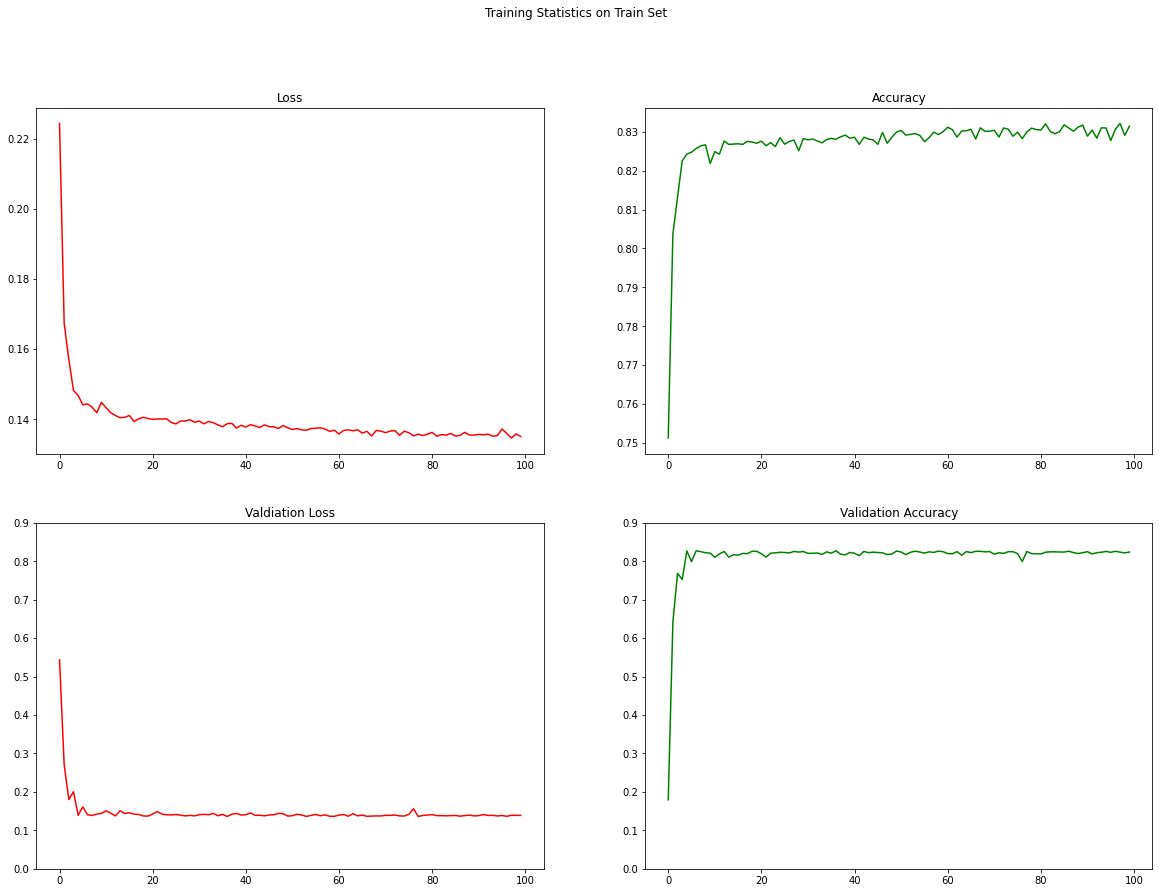

In [ ]:
plt.figure(figsize=(20, 14))
plt.suptitle('Training Statistics on Train Set')
plt.subplot(2,2,1)
plt.plot(hist.history['loss'], 'red')
plt.title('Loss')
plt.subplot(2,2,2)
plt.plot(hist.history['accuracy'], 'green')
plt.title('Accuracy')
plt.subplot(2,2,3)
plt.plot(hist.history['val_loss'], 'red')
plt.yticks(list(np.arange(0.0, 1.0, 0.10)))
plt.title('Valdiation Loss')
plt.subplot(2,2,4)
plt.plot(hist.history['val_accuracy'], 'green')
plt.yticks(list(np.arange(0.0, 1.0, 0.10)))
plt.title('Validation Accuracy')
plt.show()

In [ ]:
path_test = "/content/ISIC-2017_Test_v2_Data/ISIC-2017_Test_v2_Data/"
path_test_gt = "/content/ISIC-2017_Test_v2_Data/ISIC-2017_Test_v2_Part1_GroundTruth/"


test_dataset_path = os.listdir("/content/ISIC-2017_Test_v2_Data/ISIC-2017_Test_v2_Data/")
test_gt_dataset_path = os.listdir("/content/ISIC-2017_Test_v2_Data/ISIC-2017_Test_v2_Part1_GroundTruth/")


test_data =  sorted(test_dataset_path)
test_data = test_data[1:]
test_gt_data =  sorted(test_gt_dataset_path)


test_images = []
test_gt_images = []
count = 0

for file in test_dataset_path:
  if (count > 600):
    break
  else:
    if file.endswith('.jpg'):
      image = imread(path_test + test_data[count])
      test_images.append(cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA))
      count += 1

count = 0
for file in test_gt_dataset_path:
  if (count > 600):
    break
  else:
    image = imread(path_test_gt + test_gt_data[count])
    #image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    image = image / 255
    test_gt_images.append(cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA))
    count += 1


In [ ]:
test_images = np.array(test_images)
test_gt_images = np.array(test_gt_images)

In [ ]:
res = model_1.evaluate(test_images, test_gt_images, batch_size= 18)
print('________________________')
print('IOU:       |   {:.2f}  |'.format(res[1]*100))
print('Accuracy:  |   {:.2f}  |'.format(res[2]*100))
print("Loss:      |   {:.2f}  |".format(res[0]*100))
print('________________________')

34/34 [==============================] - 4s 116ms/step - loss: 0.1684 - iou: 0.8316 - accuracy: 0.7733
________________________
IOU:       |   83.16  |
Accuracy:  |   77.33  |
Loss:      |   16.84  |
________________________


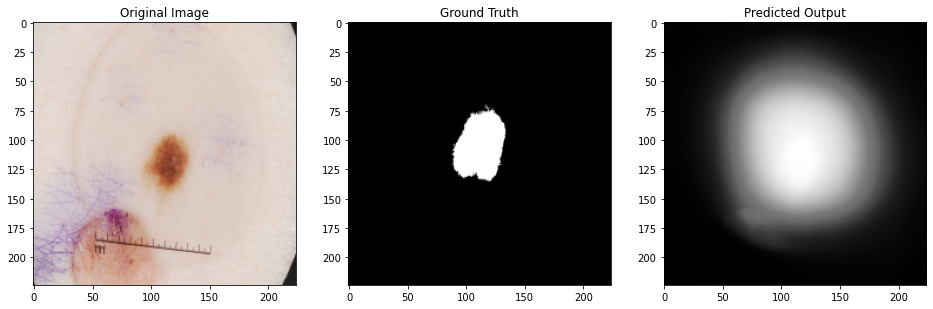

In [ ]:
img_num = 120
img_pred = model_1.predict(test_images[img_num].reshape(1,224,224,3))
plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.imshow(test_images[img_num])
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(test_gt_images[img_num], plt.cm.binary_r)
plt.title('Ground Truth')
plt.subplot(1,3,3)
plt.imshow(img_pred.reshape(224, 224), plt.cm.binary_r)
plt.title('Predicted Output')
plt.show()

In [ ]:
def enhance(img):
    sub = (model_1.predict(img.reshape(1,224,224,3))).flatten()

    for i in range(len(sub)):
        if sub[i] > 0.5:
            sub[i] = 1
        else:
            sub[i] = 0
    return sub

Success case

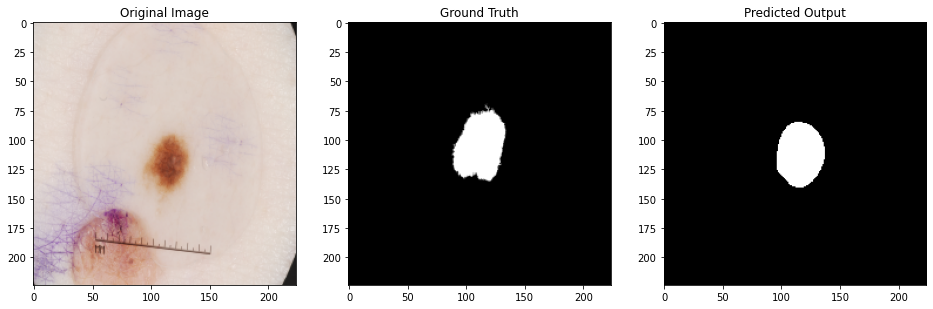

In [ ]:
img_num = 120
plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.imshow(test_images[img_num])
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(test_gt_images[img_num], plt.cm.binary_r)
plt.title('Ground Truth')
plt.subplot(1,3,3)
plt.imshow(enhance(test_images[img_num]).reshape(224, 224), plt.cm.binary_r)
plt.title('Predicted Output')
plt.show()

failure case

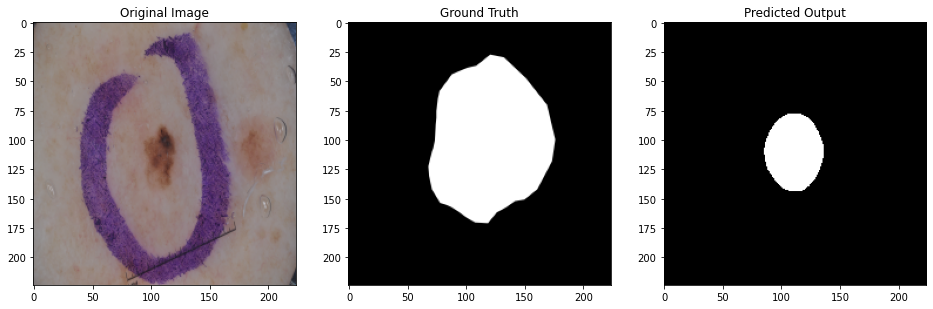

In [ ]:
img_num = 200
plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.imshow(test_images[img_num])
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(test_gt_images[img_num], plt.cm.binary_r)
plt.title('Ground Truth')
plt.subplot(1,3,3)
plt.imshow(enhance(test_images[img_num]).reshape(224, 224), plt.cm.binary_r)
plt.title('Predicted Output')
plt.show()